In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests

In [3]:
sdf = pd.read_csv('GollahallySyNo39.csv', names=('Id', 'N', 'E', 'Z', 'Comment'))
sdf.head()

,Id,N,E,Z,Comment
0,1,107300.845,94258.310,908.526,QUL
1,2,107299.032,94295.080,912.853,QUL
2,3,107292.332,94306.912,912.719,QUL
3,4,107287.705,94318.569,912.587,QUL
4,5,107275.601,94333.250,912.472,QUL


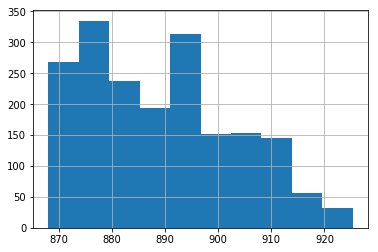

In [5]:
sdf['Z'].hist()

In [29]:
# point_url = 'https://vimanatest.vimanalabs.com/api/v1/measurements/point?'
# point_url += 'src_srs=EPSG:4326&tgt_srs=EPSG:9001&project=22&x=77.561999&y=12.844755'
# headers = {'user-agent': 'my-app/0.0.1',
#           'Authorization': 'Basic "YXNwZWNzY2lyZTpkcm9uZUAxMjM="'}
# r = requests.get(point_url, headers=headers)
# r.text


ELEV_URL = 'https://vimanatest.vimanalabs.com/api/v1/measurements/point?'
ELEV_URL += 'src_srs={src}&tgt_srs={tgt}&project={project_id}&x={x}&y={y}'
ELEV_URL_HEADERS = {'Authorization': 'Basic "YXNwZWNzY2lyZTpkcm9uZUAxMjM="'}

def get_point(x, y, project_id=22, src='EPSG:9001', tgt='EPSG:4326'):
    elev_url_inst = ELEV_URL.format(x=x, y=y, project_id=project_id, src=src, tgt=tgt)
    r = requests.get(elev_url_inst, headers=ELEV_URL_HEADERS)
    val = r.json()
    if val and val['point']:
        return (val['point']['x'], val['point']['y'])
    
get_point(107300.845, 94258.310)

(77.56164708658628, 12.841907905461001)

In [44]:
# sdfh = sdf.head()
points = sdf.apply(lambda x: pd.Series(get_point(x['N'], x['E'])), axis=1)
points.columns = ['Lng', 'Lat']
points.head()

,Lng,Lat
0,77.561647,12.841908
1,77.561634,12.842240
2,77.561573,12.842348
3,77.561531,12.842453
4,77.561421,12.842587


In [47]:
sdfgeo = pd.concat([sdf, points], axis=1)
sdfgeo.tail()

,Id,N,E,Z,Comment,Lng,Lat
1880,1881,107301.492,94725.956,909.109,QUL,77.561695,12.846132
1881,1882,107322.125,94787.339,907.882,PC1,77.561890,12.846685
1882,1883,107305.657,94730.089,909.736,PC3,77.561734,12.846169
1883,1884,107490.681,94726.254,880.824,PC4,77.563437,12.846119
1884,1885,107305.573,94845.790,899.729,PC2,77.561743,12.847215


In [49]:
sdfgeo.to_csv('GollahallySyNo39-GeoCoords.csv', index=False)

In [55]:
#src_srs=EPSG:4326&date=2017-12-12T08:00:00.000Z&x=77.561326&y=12.845328
ELEV_URL = 'https://vimanatest.vimanalabs.com/api/v1/measurements/elevation?'
ELEV_URL += 'src_srs={src}&date={dt}&x={x}&y={y}'
ELEV_URL_HEADERS = {'Authorization': 'Basic "YXNwZWNzY2lyZTpkcm9uZUAxMjM="'}

def get_elevation(x, y, dt='2017-12-12T08:00:00.000Z', src='EPSG:4326'):
    elev_url_inst = ELEV_URL.format(x=x, y=y, dt=dt, src=src)
    r = requests.get(elev_url_inst, headers=ELEV_URL_HEADERS)
    val = r.json()
    if val and val['local']:
        return val['local']['z']
    
get_elevation(77.561695, 12.846132)

911.68798828125

In [57]:
# sdfgeoh = sdfgeo.head()
points = sdfgeo.apply(lambda x: pd.Series(get_elevation(x['Lng'], x['Lat'])), axis=1)
points.columns = ['Z_NEW']
points.head()

,Z_NEW
0,914.822571
1,916.380676
2,911.936829
3,916.154358
4,915.154419


In [58]:
sdfgeo_elev = pd.concat([sdfgeo, points], axis=1)
sdfgeo_elev.tail()

,Id,N,E,Z,Comment,Lng,Lat,Z_NEW
1880,1881,107301.492,94725.956,909.109,QUL,77.561695,12.846132,911.687988
1881,1882,107322.125,94787.339,907.882,PC1,77.561890,12.846685,912.004028
1882,1883,107305.657,94730.089,909.736,PC3,77.561734,12.846169,913.924255
1883,1884,107490.681,94726.254,880.824,PC4,77.563437,12.846119,874.940491
1884,1885,107305.573,94845.790,899.729,PC2,77.561743,12.847215,904.765320


In [59]:
sdfgeo_elev.to_csv('GollahallySyNo39-GeoCoords_Elev.csv', index=False)

In [60]:
sdfgeo_elev['Z_DELTA'] = sdfgeo_elev['Z_NEW'] - sdfgeo_elev['Z']
sdfgeo_elev.head()

,Id,N,E,Z,Comment,Lng,Lat,Z_NEW,Z_DELTA
0,1,107300.845,94258.310,908.526,QUL,77.561647,12.841908,914.822571,6.296571
1,2,107299.032,94295.080,912.853,QUL,77.561634,12.842240,916.380676,3.527676
2,3,107292.332,94306.912,912.719,QUL,77.561573,12.842348,911.936829,-0.782171
3,4,107287.705,94318.569,912.587,QUL,77.561531,12.842453,916.154358,3.567358
4,5,107275.601,94333.250,912.472,QUL,77.561421,12.842587,915.154419,2.682419


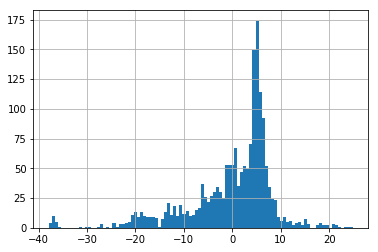

In [62]:
sdfgeo_elev['Z_DELTA'].hist(bins=100)